In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


In [38]:
path = '/content/drive/MyDrive/Colab/DIY_learning/GoldPrice/Gold_data.csv'
df = pd.read_csv(path)
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [39]:
data = df['price']
data.head()

0    2252.60
1    2454.50
2    2708.10
3    2577.80
4    2597.75
Name: price, dtype: float64

# Checking stationarity in the dataset

## Augumented Dickey Fuller(ADF) test

### Hypothesis testing

*   Null hypothesis(H0) - Series is not stationary or series has unit root

*   Alternate hypothesis(Ha) - Series is stationary or series has no unit root

###Conclusion:
 

*   If Test statistic < critical value, reject H0.
*   Also based on p-value




In [40]:
from statsmodels.tsa.stattools import adfuller

# Function to print adf results, timeseries - independent variable
def adf_test(timeseries):
  
  print('Results of ADF test: ')
  
  dftest =  adfuller(timeseries, autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  
  print(dfoutput)

In [41]:
adf_test(df['price'])
# Thus data is not stationary 

Results of ADF test: 
Test statistic                   -0.309904
p-value                           0.924090
#Lags Used                       26.000000
Number of Observations Used    2155.000000
Critical Value (1%)              -3.433388
Critical Value (5%)              -2.862882
Critical Value (10%)             -2.567484
dtype: float64


## KPSS test

### Hypothesis testing


*   Null hypothesis(H0) - Series is trend stationary or has no unit root
*   Alternate hypothesis(Ha) - Series is non trend stationary or has unit root

A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the ‘presence of a deterministic trend’.


In [42]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
  
  print('Results of KPSS test: ')
  
  kpsstest = kpss(timeseries, regression = 'c')
  kpss_output = pd.Series(kpsstest[0:3], index = ['Test statistic', 'p-value', '#Lags Used'])
  
  for key, value in kpsstest[3].items():
    kpss_output['Critical value (%s)' %key] = value
  
  print(kpss_output)

In [43]:
kpss_test(df['price'])

Results of KPSS test: 
Test statistic            7.218406
p-value                   0.010000
#Lags Used               26.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## Lag plot

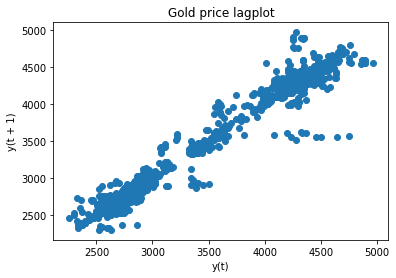

In [44]:
pd.plotting.lag_plot(data, lag = 1)
plt.title('Gold price lagplot')
plt.show(block = True)

## Histogram plot

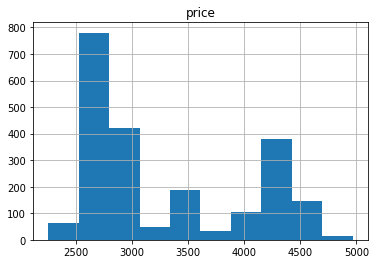

In [45]:
df.hist()
plt.show()

## ACF plot

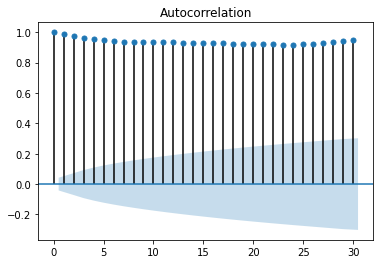

In [46]:
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv(path, header = 0, index_col = 0, parse_dates = True)
plot_acf(df, lags = 30)
plt.show()

## PACF plot

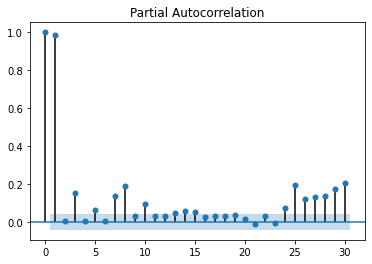

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df, lags = 30)
plt.show()

## Data visualisations

In [48]:
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [49]:
Gold = pd.read_csv(path)
# Gold = df.copy()
Gold.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [50]:
Gold.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [51]:
Gold = Gold.interpolate()

In [52]:
nan_index = Gold[Gold['price'].isnull()].index.tolist()
nan_index

[]

In [53]:
Gold.iloc[10]

date     2016-01-11
price        2759.8
Name: 10, dtype: object

In [54]:
Gold['date'] = pd.to_datetime(Gold['date'])
Gold['month'] = Gold['date'].dt.month_name().str[:3]
Gold['year'] = pd.DatetimeIndex(Gold['date']).year
Gold.head()

,date,price,month,year
0,2016-01-01,2252.60,Jan,2016
1,2016-01-02,2454.50,Jan,2016
2,2016-01-03,2708.10,Jan,2016
3,2016-01-04,2577.80,Jan,2016
4,2016-01-05,2597.75,Jan,2016


In [55]:
Gold.isnull().sum()

date     0
price    0
month    0
year     0
dtype: int64

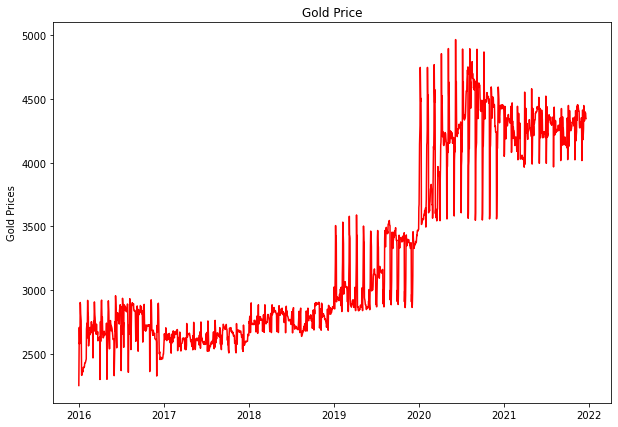

In [56]:
plt.figure(figsize=(10, 7))
plt.plot(Gold.date,Gold.price,color='r')
plt.ylabel("Gold Prices")
plt.title("Gold Price")
plt.show()

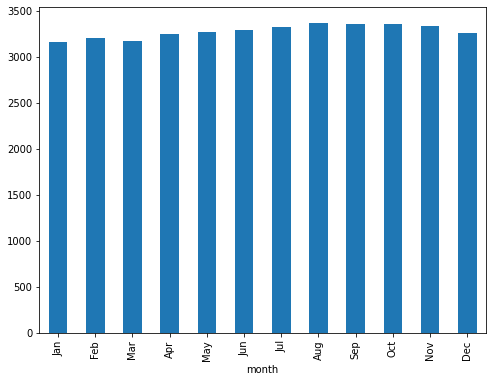

In [57]:
plt.figure(figsize=(8,6))
Gold.groupby('month')['price'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')

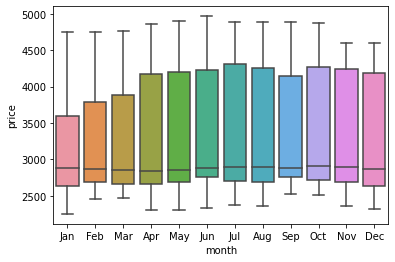

In [58]:
#Box plots
sns.boxplot(x="month",y="price",data=Gold)

Text(0.5, 0, 'price')

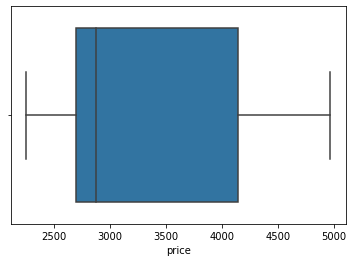

In [59]:
#Box plots
sns.boxplot(x='price',data=Gold)
plt.xlabel("price")
#plt.ylabel("FFT amplitude")
# plt.savefig('plot.png')

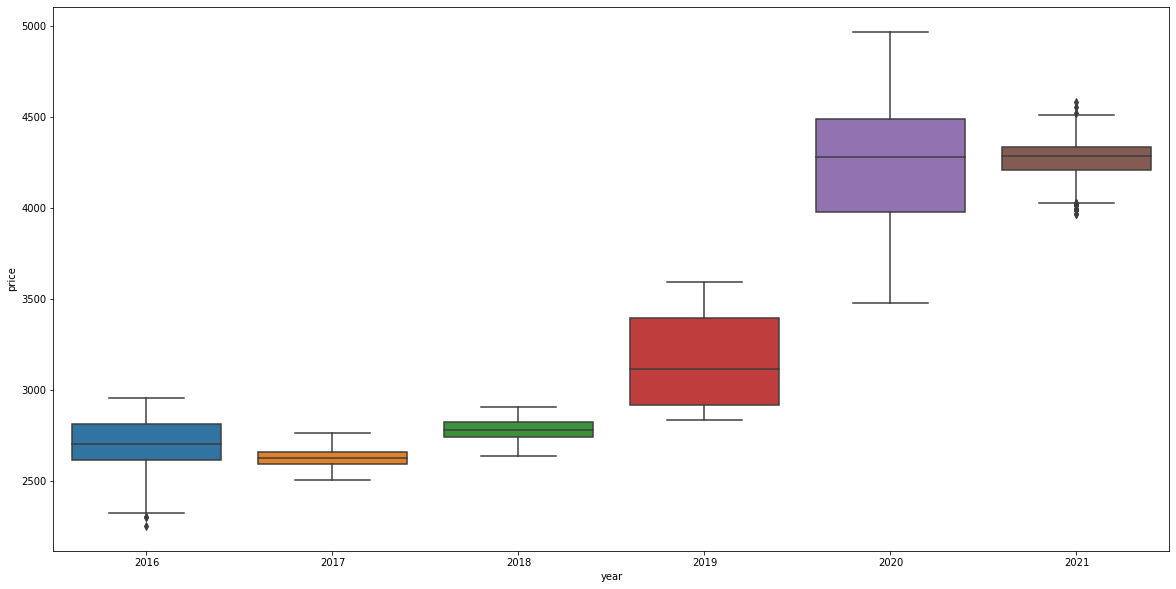

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(x="year",y="price",data=Gold)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


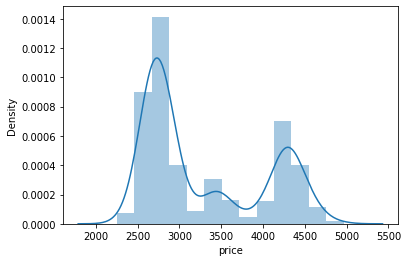

In [61]:
sns.distplot(Gold.price)

## Prophet model

In [62]:
!pip install fbprophet

import fbprophet

print('Prophet %s' % fbprophet.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Prophet 0.7.1


In [63]:
df_gold = pd.read_csv(path, header = 0)
df_gold.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [64]:
df_gold.shape

(2182, 2)

In [65]:
df_gold.columns = ['ds', 'y']
df_gold['ds'] = pd.to_datetime(df_gold['ds'])
df_gold.head()

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [66]:
from fbprophet import Prophet
model = Prophet()

In [67]:
model.fit(df_gold)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
# Forecasting for 2022 

future = list()
for i in range(1, 30):
	date = '2022-1-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [69]:
future.head()

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [70]:
# Saving model, uncomment only if you wanna save the model

# import pickle

# filename = 'model_pkl.sav'

# # create an iterator object with write permission - model.pkl
# with open(filename, 'wb') as files:
#     pickle.dump(model, files)

## Model forecaste results

In [71]:
forecast = model.predict(future)

In [72]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat   yhat_lower   yhat_upper
0 2022-01-01  4287.874277  4078.700981  4508.074656
1 2022-01-02  4289.328625  4054.465124  4497.689458
2 2022-01-03  4293.896795  4084.252030  4521.989005
3 2022-01-04  4296.847299  4064.502458  4504.197255
4 2022-01-05  4297.481981  4077.920662  4510.512553


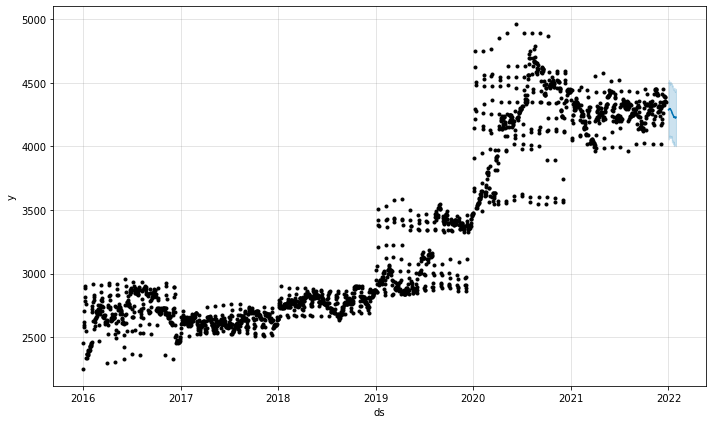

In [73]:
model.plot(forecast)
plt.show()

## Model evaluation

In [74]:
train_df = df_gold.drop(df_gold.index[-29:])
print(train_df.tail())

             ds       y
2148 2021-11-18  4423.3
2149 2021-11-19  4410.1
2150 2021-11-20  4404.2
2151 2021-11-21  4404.2
2152 2021-11-22  4311.2


In [75]:
train_df.shape

(2153, 2)

In [76]:
df_gold.shape

(2182, 2)

In [77]:
from sklearn.metrics import mean_absolute_error

# calculate MAE between expected and predicted values for december
y_true = df_gold['y'][-29:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 87.208


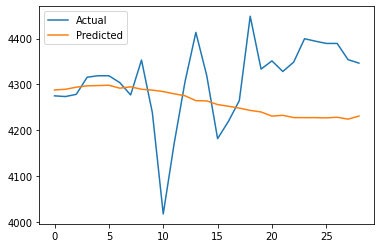

In [78]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()